Fundamentals of Machine Learning - Anouk D01

Made with help of the lessons and examples and datasets on Teams

# <font color=blue>Weekly assignment 1: exploratory data analysis</font>

## Data cleaning

### Step 1: Read in and merge the two data sets (tip: think of different CSV formats that exist)

First I read both the datasets

In [179]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', sep=";")
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


Then I put them together on their common identifier

In [181]:
df = pd.merge(df1, df2, on = 'id') 

In [182]:
print(df)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929        NaN     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  12-5-2014  13-5-2014

### Step 2: Clean the data: remove impossible values

In [183]:
df['weight']

0      98.0
1      77.0
2      83.0
3      80.0
4      61.0
       ... 
924    59.0
925    90.0
926    71.0
927    65.0
928    76.0
Name: weight, Length: 929, dtype: float64

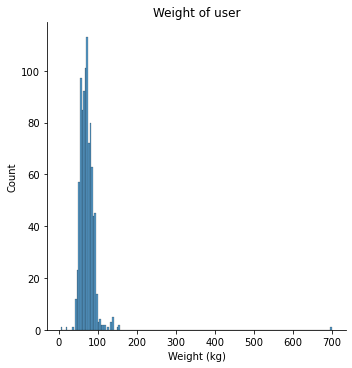

In [184]:
sns.displot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of user')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

When looking at the 'weight' variable, I could see some extreme outliers, like the examples of people almost being 700 or 20 kilos. These are mostly unrealistic and therefore needed to be removed/cleaned up<br>
This could be achieved with the code below

In [185]:
df = df[(df["weight"] < 200) & (df["weight"] > 35)]
df['weight']

0      98.0
1      77.0
2      83.0
3      80.0
4      61.0
       ... 
924    59.0
925    90.0
926    71.0
927    65.0
928    76.0
Name: weight, Length: 924, dtype: float64

After the clean up of 'weight' the histogram looks a lot more realistic and readable

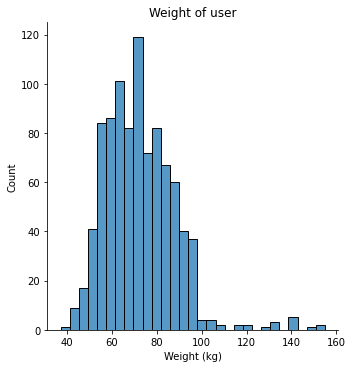

In [186]:
sns.displot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of user')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

### Step 3: Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 

Before I start I first need to understand the step<br>
The mean is = "Add the numbers up, divide by the total number of values in the set." https://thestatsninja.com/2019/01/05/how-to-measure-typical/, so the mean is like the average.<br>
So I need to calculate the average step that each person took. To do this, I need to sum up all the steps from a person together and then divide them by the amount of days that they walked<br>
To begin, I first want to give myself an overview of the data

In [187]:
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,NaN,NaN,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,NaN,NaN,Lille,Female,55-64,1,1,High school,172.0,65.0


I need to complete this step with .loc and .mean<br>
First I want to remember myself what .loc means.<br>
.loc can give me an individual row information, as seen below

In [188]:
df.loc[1]

id                    2
20-6-2013           NaN
21-6-2013           NaN
22-6-2013       10473.0
23-6-2013         705.0
                 ...   
hh_size               1
education             3
education_1    Bachelor
height            180.0
weight             77.0
Name: 1, Length: 337, dtype: object

"mean() function can be used to calculate mean/average of a given list of numbers. It returns mean of the data set passed as parameters." https://www.geeksforgeeks.org/python-statistics-mean-function/ <br>
So .mean sums up all the ints in a row for me

In [189]:
df.mean(axis='columns')

0       9907.035294
1       5519.720238
2       8032.196078
3       2917.120000
4       4866.016949
           ...     
924     5966.979167
925     4385.636364
926     9797.142857
927    14781.639535
928     7325.781690
Length: 924, dtype: float64

The problem that occurs is that means takes all the ints from the rows, so small numbers like education are also taken in the average. This lowers their means step per participant a lot, so with .loc I can remove these ints from being taken. So I have to combine them both (NaN will be overlooked!)

First, lets create a new column<br>
Second, the .loc part, with help from https://www.statology.org/pandas-exclude-column/<br>
Third, apply .mean

In [190]:
df["means_step_per_participant"] = df.loc[:, ~df.columns.isin(["education", "hh_size", "age", "height", "weight"])].mean(axis="columns")

Now to check if it worked:<br>
And it did, because when looking at .mean from above, the first row first got 9907 (with edu, age etc.), and now it has 10144. (without edu, age etc.)<br>
So for person one in the row, he walked an average of 10144 steps when walking

In [191]:
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,means_step_per_participant
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10144.048193
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5652.756098
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8246.033557
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3460.380952
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5215.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,NaN,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6223.902174
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4723.921569
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,9986.135922
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,NaN,Lille,Female,55-64,1,1,High school,172.0,65.0,15499.780488


### Step 4: Show the head() of the resulting data frame

In [192]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,means_step_per_participant
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10144.048193
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5652.756098
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8246.033557
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3460.380952
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5215.636364


## Exploratory data analysis

### Step 1: An analysis of mean steps per participant

#### Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)

Now I want to look at 'mean steps per participant' in different graphs. The graphs I could find in the examples of on the site on sns<br>
I first wanted to experiment with the graphs and just put them all down

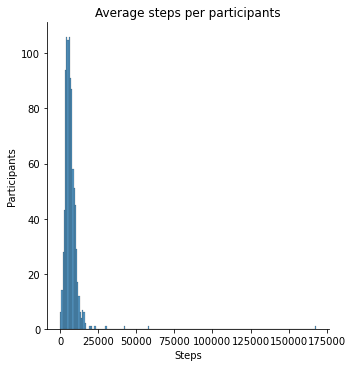

In [193]:
sns.displot(df['means_step_per_participant'].dropna(), kde=False)
plt.title('Average steps per participants')
plt.xlabel('Steps')
plt.ylabel('Participants')
plt.show()

<AxesSubplot:xlabel='means_step_per_participant'>

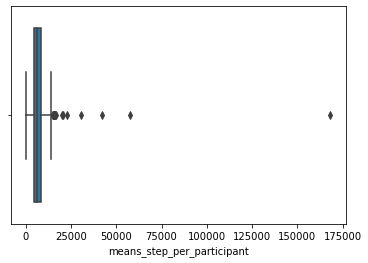

In [194]:
sns.boxplot(x=df['means_step_per_participant'])

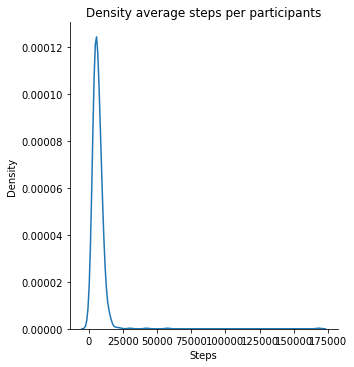

In [195]:
sns.displot(df, x='means_step_per_participant', kind="kde")
plt.title('Density average steps per participants')
plt.xlabel('Steps')
plt.ylabel('Density')
plt.show()

<AxesSubplot:xlabel='means_step_per_participant'>

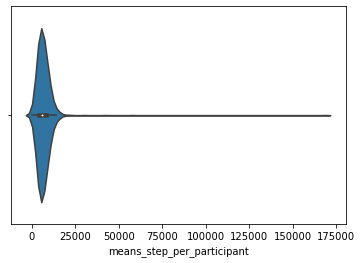

In [196]:
sns.violinplot(x=df['means_step_per_participant'])

The graphs are working, but I could definitely see some outliers, just like the 'weight' variable I went to remove the odd points<br>
After that, I repeated the graphs

In [197]:
df = df[(df["means_step_per_participant"] < 30000)]

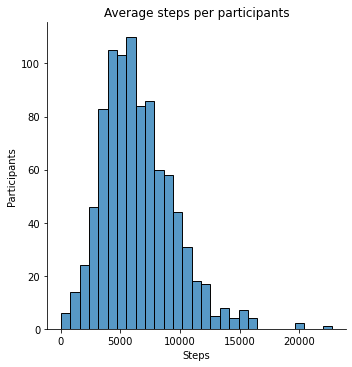

In [198]:
sns.displot(df['means_step_per_participant'].dropna(), kde=False)
plt.title('Average steps per participants')
plt.xlabel('Steps')
plt.ylabel('Participants')
plt.show()

<AxesSubplot:xlabel='means_step_per_participant'>

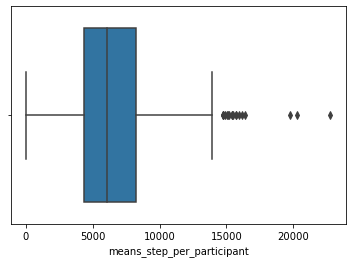

In [199]:
sns.boxplot(x=df['means_step_per_participant'])

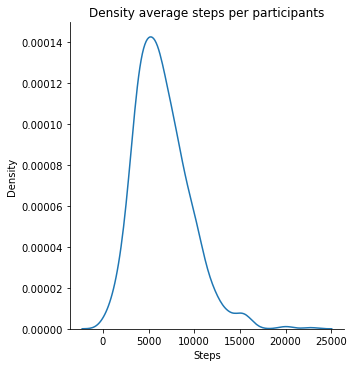

In [200]:
sns.displot(df, x='means_step_per_participant', kind="kde")
plt.title('Density average steps per participants')
plt.xlabel('Steps')
plt.ylabel('Density')
plt.show()

<AxesSubplot:xlabel='means_step_per_participant'>

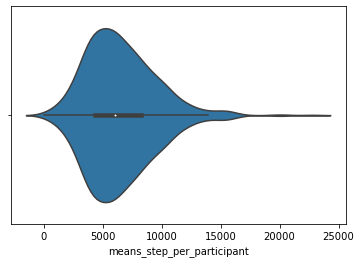

In [201]:
sns.violinplot(x=df['means_step_per_participant'])

#### Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)

"Mean: Add the numbers up, divide by the total number of values in the set. Also known as the arithmetic mean and informally called the “average”." https://thestatsninja.com/2019/01/05/how-to-measure-typical/

In [202]:
df.mean()['means_step_per_participant']

6499.574917880323

So, the average steps that a person took a day, from the whole dataset combined, the average of all the people, is 6500

"Median: Put the numbers in order from least to greatest (ugh, the worst part) and find the middle number. Oh, there’s two middle numbers? Average them. Did you leave out a number? Start over." https://thestatsninja.com/2019/01/05/how-to-measure-typical/ <br>
So, value that is in the middle

In [203]:
df.median()['means_step_per_participant']

6059.324381495448

This answer can be confirmed when looking at the graphs, where you can see that around 6000 most people had their steps

Variance: "*defenition: average squared deviation of the list elements from the average value."(https://blog.finxter.com/how-to-calculate-the-column-variance-of-a-dataframe-in-python-pandas/)<br>
"In pure statistics, variance is the squared deviation of a variable from its mean. Basically, it measures the spread of random data in a set from its mean or median value. A low value for variance indicates that the data are clustered together and are not spread apart widely, whereas a high value would indicate that the data in the given set are much more spread apart from the average value." https://www.geeksforgeeks.org/python-statistics-variance/

In [204]:
df.var()['means_step_per_participant']

8940494.909893692

This high number is correct. As we can see in the first graphs, before I cleaned them, there was an outlier around 175000

#### Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.

The distribution of the graph and its shape seems very logical. Most people take around 6500 steps when going for a walk, some below, some above. But most of them around the same.<br>
Normality: I think the graph is very normal, most graphs look like this. The mean is also close to the median, which shows that there is no large amounts of small outliers<br>
Skewness: The graph is right skewed, which means that the mean > median. The average is slightly above the steps that most people have taken (6000)<br>
Outliers: One big walker/outlier was removed. There are also some around the 20000, but I did not think that those  outliers were big of far enough to be removed

### Step 2: The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)

For this step I went through multiple variables and looked at how at how differences in gender, age and education had effect on the mean steps per participant. The graphs are from help of the examples or from the site from sns

#### Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.

<AxesSubplot:xlabel='means_step_per_participant', ylabel='Count'>

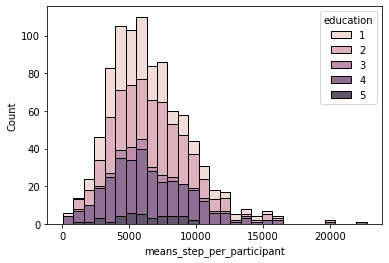

In [205]:
sns.histplot(data=df, x='means_step_per_participant', hue='education', multiple="stack")

<AxesSubplot:xlabel='means_step_per_participant', ylabel='age'>

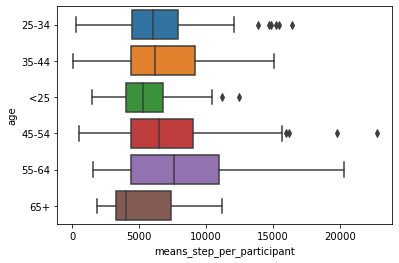

In [206]:
sns.boxplot(x='means_step_per_participant', y='age', data=df)

<AxesSubplot:xlabel='means_step_per_participant', ylabel='age'>

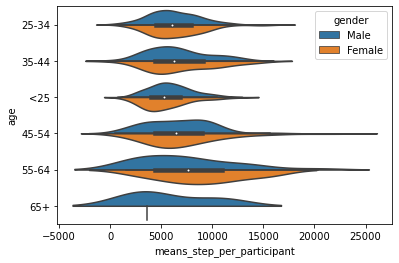

In [207]:
sns.violinplot(x='means_step_per_participant', y='age', hue="gender", data=df, split=True)

#### Describe and interpret the results

Mean steps per participant and education: It can be seen that education levels from 1, 2 and 4 are the biggest walkers. They are pretty evenly divided. 3 and 5 tend to walk a lot less, with I believe education level 3 the one who walkes the least<br>
Mean steps per particiapnt and age: For age the age group 55-64 walked the most, with after them the 35-44 and 45-54 group. The least of the bunch is the <25 group. I think these results are very logical, as young people tend to be more inside and on the internet focused, while the older generations tend to take long walk breaks when having a break while working or when when just casually walking in the weekend<br>
Mean steps per participant and gender: The gender distrubition does not have a lot of differences. We can see that male and females are pretty 50/50, with females walking more in the 55-64 age category and males winning in the <25 category. Furthermore in the 65+ category there are only males. But overall, there are no big differences to count

# <font color=green>Weekly assignment 2: correlation</font>

## Feature engineering

### Step 1: The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.

I tought of BMI, as it gives an indication of healthy weight and it can be calculated with the variables weight and height.


I did have to look up how it can be calculated, and also how in python:<br>
https://dev.to/mindninjax/how-to-build-a-bmi-calculator-in-python-4g2g, BMI = weight / (height/100)**2

In [208]:
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2

<ipython-input-208-daadad9cc73c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BMI"] = df["weight"] / (df["height"] / 100) ** 2


Seeing if it works:

In [209]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,means_step_per_participant,BMI
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10144.048193,30.930438
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5652.756098,23.765432
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8246.033557,25.617284
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3460.380952,25.249337
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5215.636364,21.872423


## Exploratory data analysis

### Step 1: Make a scatterplot matrix of the numerical variables

I wanted to experiment with multiple numerical variables, so I made different scatterplots. My favorite one being the first one with 'means_step_per_particpant' and 'BMI'. The scatterplot code I got from the examples

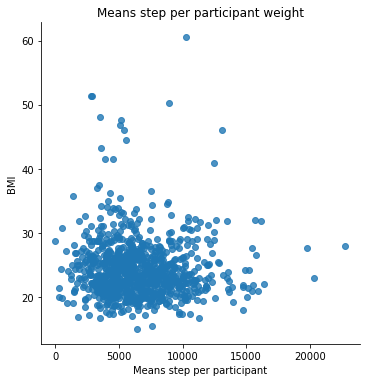

In [210]:
sns.lmplot(x='means_step_per_participant', y='BMI', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Means step per participant') #use matplotlib to refine Seaborn plot
plt.ylabel('BMI')
plt.title('Means step per participant weight')
plt.show()

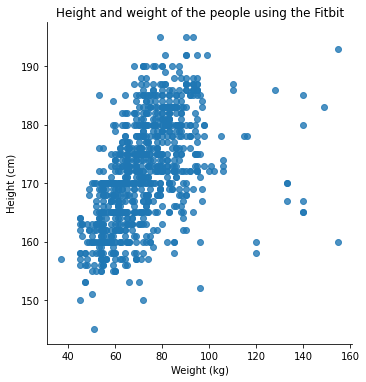

In [211]:
sns.lmplot(x='weight', y='height', fit_reg=False, data=df) 
plt.xlabel('Weight (kg)') 
plt.ylabel('Height (cm)')
plt.title('Height and weight of the people using the Fitbit')
plt.show()

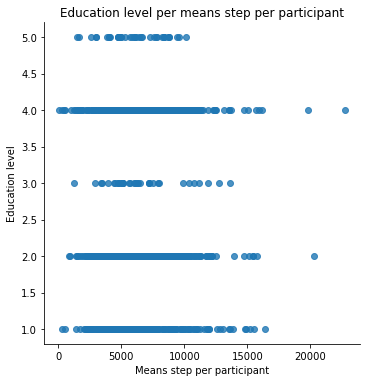

In [212]:
sns.lmplot(x='means_step_per_participant', y='education', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Means step per participant')
plt.ylabel('Education level')
plt.title('Education level per means step per participant')
plt.show()

### Step 2: Make a correlation matrix of the numerical variables

"A correlation matrix is a table containing correlation coefficients between variables. Each cell in the table represents the correlation between two variables. A correlation matrix is used to summarize data, as a diagnostic for advanced analyses and as an input into a more advanced analysis." https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/

First step, is getting the Pearson's r

"Let's calculate the correlation, Pearson's _r_. Remember that correlation is a number between -1 and 1 that shows how much the variables 'go together'." quote from example

I got the correlation function from the examples

In [213]:
print(pearsonr(df['means_step_per_participant'],df['education']))

(0.011756483217990103, 0.7217512274546041)


The next Pearson's _r_ did not work in the beginning. This is because "height" (and therefore also BMI) had a NaN object, first I had to seek it and then remove it to continue

In [214]:
df[df["height"].isnull()]

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,means_step_per_participant,BMI
261,262,NaN,NaN,NaN,NaN,13699.0,NaN,5628.0,10005.0,14928.0,...,Lille,Male,25-34,1,1,Master or doctorate,NaN,53.0,7391.641026,NaN


I decided that removing the row would be the smartest

In [215]:
df = df.drop([261])

In [216]:
df[df["height"].isnull()]

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,means_step_per_participant,BMI


Now I can continue with the Pearson's r for weight and height

In [217]:
print(pearsonr(df['weight'],df['height']))

(0.510301456536701, 4.410807814541697e-62)


In [218]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df['means_step_per_participant'],df['BMI']))

(-0.03368703912873669, 0.30767029790164335)


I had now discovered Pearson's r for different variables together.<br><br>

For the second step, I put all variables together for a correlation matrix. Code with the help of the example page

In [219]:
corr = df[['means_step_per_participant', 'education', 'weight', 'height', 'BMI']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,means_step_per_participant,education,weight,height,BMI
means_step_per_participant,1.000000,0.012156,-0.065306,-0.067635,-0.033687
education,0.012156,1.000000,0.010296,-0.036400,0.030934
weight,-0.065306,0.010296,1.000000,0.510301,0.867172
height,-0.067635,-0.036400,0.510301,1.000000,0.024243
BMI,-0.033687,0.030934,0.867172,0.024243,1.000000


I also made a heatmap of the correlation matrix

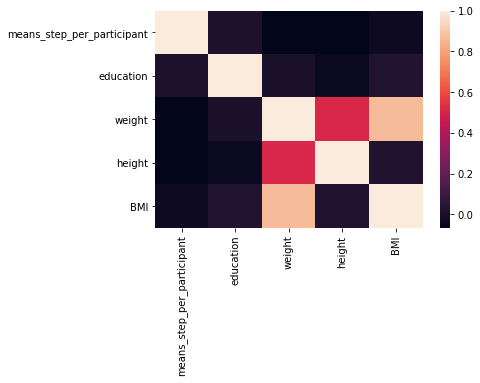

In [220]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

### Step 3: Describe and interpret the results

We can see a lot of things from the correlation matrix and the heatmap:<br>
The mean steps per participant don't seem to have a strong correlation with any of the variables in the matrix. They are actually all highly significant (r < 0.01). This means education, age or BMI don't really have an effect in the steps that you take<br>
But for example looking at a high correlation, we can look at BMI and weight (r = 0.87), which makes a lot of sense, because weight is a strong factor in resulting the BMI score. So significance (p) is high.<br>
Another moderate correlation is weight with height (r = 0.51), which is also self explanatory<br><br>
Unfortunately, it is disappointing that mean step per participant and or BMI did not have a fun correlation with any of the other variables. Maybe I did something wrong, but from my results, your age, gender, weight and more does not affect the steps you take.

# <font color=red>Weekly assignment 3: linear regression</font>

## Predictive model

### Step 1: Explain linear regression in your own words

The relationship between a dependent variable and multiple independent. It graphs the relationship with a line<br>
So it finds out the relationship between x and y<br>
y = b0 + b1X + e<br>
It looks at one step on the x-as, how much it moves on the y-as. So if the x-as moves one step, and y moves two up. Then it is a positive linear progression of y = 2x

### Step 2: Create dummy variables for the categorical variables

Linear regression only accepts numerical variables. So we have to make dummies for the categorical variables

"Categorical variables represent types of data which may be divided into groups.  Examples of categorical variables are race, sex, age group, and educational level." http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm

In [221]:
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,means_step_per_participant,BMI
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10144.048193,30.930438
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5652.756098,23.765432
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8246.033557,25.617284
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3460.380952,25.249337
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5215.636364,21.872423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6223.902174,21.671258
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4723.921569,24.414062
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,9986.135922,21.672110
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,Lille,Female,55-64,1,1,High school,172.0,65.0,15499.780488,21.971336


I decided to take three fun categorical variables<br>
Dummy code found on the powerpoint lesson 3

In [222]:
a = pd.get_dummies(df[["gender", "age", "education_1"]])
a

,gender_Female,gender_Male,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,education_1_Bachelor,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,1,0,0,0,1,0,0,0,0,0,1,0,0,0
925,0,1,0,0,0,0,0,1,1,0,0,0,0,0
926,0,1,0,1,0,0,0,0,1,0,0,0,0,0
927,1,0,0,0,0,1,0,0,0,1,0,0,0,0


### Step 3: Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

Understanding the step, I need to make training data to predict the mean steps per participant. After that fit it into a linear regression model.

First I have to train the data, I did this with the help from the examples codes

information from the powerpoint:<br>
y = independent variable = means step per participant<br>
x = dependent variable = a dummy variable, one of each (gender, age, education)

In [223]:
from sklearn.model_selection import train_test_split

x = a[["gender_Female", "age_<25", "education_1_Bachelor"]]
y = df['means_step_per_participant'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #splits the data into train (70%) and test (30%) data

Next step: putting the training data in a linear regression model and finding the regression line

In [224]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() #create a new (empty model)
lm = lm.fit(x_train, y_train) #fit the model WITH THE TRAIN DATA ONLY

In [225]:
b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 6474.65 + 274.18X


For a female, under the age of 25, with a Bachelor, her linear regression model looks like:

So her mean steps per participants starts at 6475 steps and has an increase of 247 steps per y

$y= 6475 + +274x$

*note: each run can have a different result, because the training data learns different every time

## Evaluation

### Step 1: Evaluate the model on the test data

#### Predictive power of the model (R2, RMSE)

"RMSE (Root Mean Squared Error) is the error rate by the square root of MSE."<br>
"R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is."<br>
https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html

In these next step I calculate the R2 and RMSE, with code help from the examples

In [226]:
y_test_p = lm.predict(x_test)

In [227]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_p)

0.016152707290205792

The R2 is pretty low, which means the variation is not much explained.

In [228]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted 

3065.970850620079

The RMSE is 2588 off from the predicted value

#### Investigate the residuals

"A residual is the difference between an observed value and a predicted value in a regression model." https://www.statology.org/standardized-residuals-python/<br>
I also did this code with help from the examples

In [229]:
lm2 = LinearRegression() #create a new (empty model)
lm2.fit(x, y) #fit the model with all the data
y_p = lm.predict(x)
r2_score(y, y_p) 

0.015556389051856634

### Describe and interpret the results

I think that the R2 did not work correctly, as it gives a very low result. This means we can very little explain about the variation in our data<br>
RMSE tells us how far an outlier is off from the rest of the group, which in this case with mean steps per participant is 2588 steps, which seems legit<br>
The residual is observed value – predicted value. I also believe that this result is not complete. For the residual itself, I think it is the distance between the linear regression line and the outlier

## Conclusion

I really liked this assignment! I feel like I learned a lot and I really liked seeing the results. Although I must admit that the weekly assignment from week 3 was kind of difficult to make and explain. Especially the evaluation part, I am not sure I understand all the R2, RMSE, residual and how to correctly put the training data in.<br>
I think a struggle part with the training data is that in the example it shows for x = df["area" etc], but in the step it asks to use the dummy variables. I think this made the results so low, which made it difficult for me to interpret it.<br>
But overall I really liked working with the dataset, all the different types of graphs, making new things like BMI, and looking at the relations between them and other variables. It was very interesting